In [215]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import kruskal, pointbiserialr, randint, uniform

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, recall_score

In [216]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MaskiVal/DataSets/main/liver_patient.csv')

## 1 - Exploration des données

### 1.1.1 Nombre de données, visualisation des colonnes du dataset, des types de données et les duplicatas

In [217]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [218]:
df.shape

(583, 11)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [220]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [221]:
#affiche tous les doublons
df[df.duplicated(keep=False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


### 1.1.2 - Observation des valeurs NULL

In [222]:
df_copy = df.copy()

df_copy[df_copy.isna().any(axis = 1)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [223]:
# vérification des valeurs qui sont au dessus de Total_Bilirubin
vérif = df['Direct_Bilirubin'] > df['Total_Bilirubin']
df_anomalie = df[vérif]
df_anomalie

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
246,55,Male,1.8,9.0,272,22,79,6.1,2.7,0.7,1
261,33,Male,1.5,7.0,505,205,140,7.5,3.9,1.0,1
279,48,Female,1.0,1.4,144,18,14,8.3,4.2,1.0,1


## 1.2 - Observation des variables du dataframe 

### 1.2.1 - Analyse de la distribution

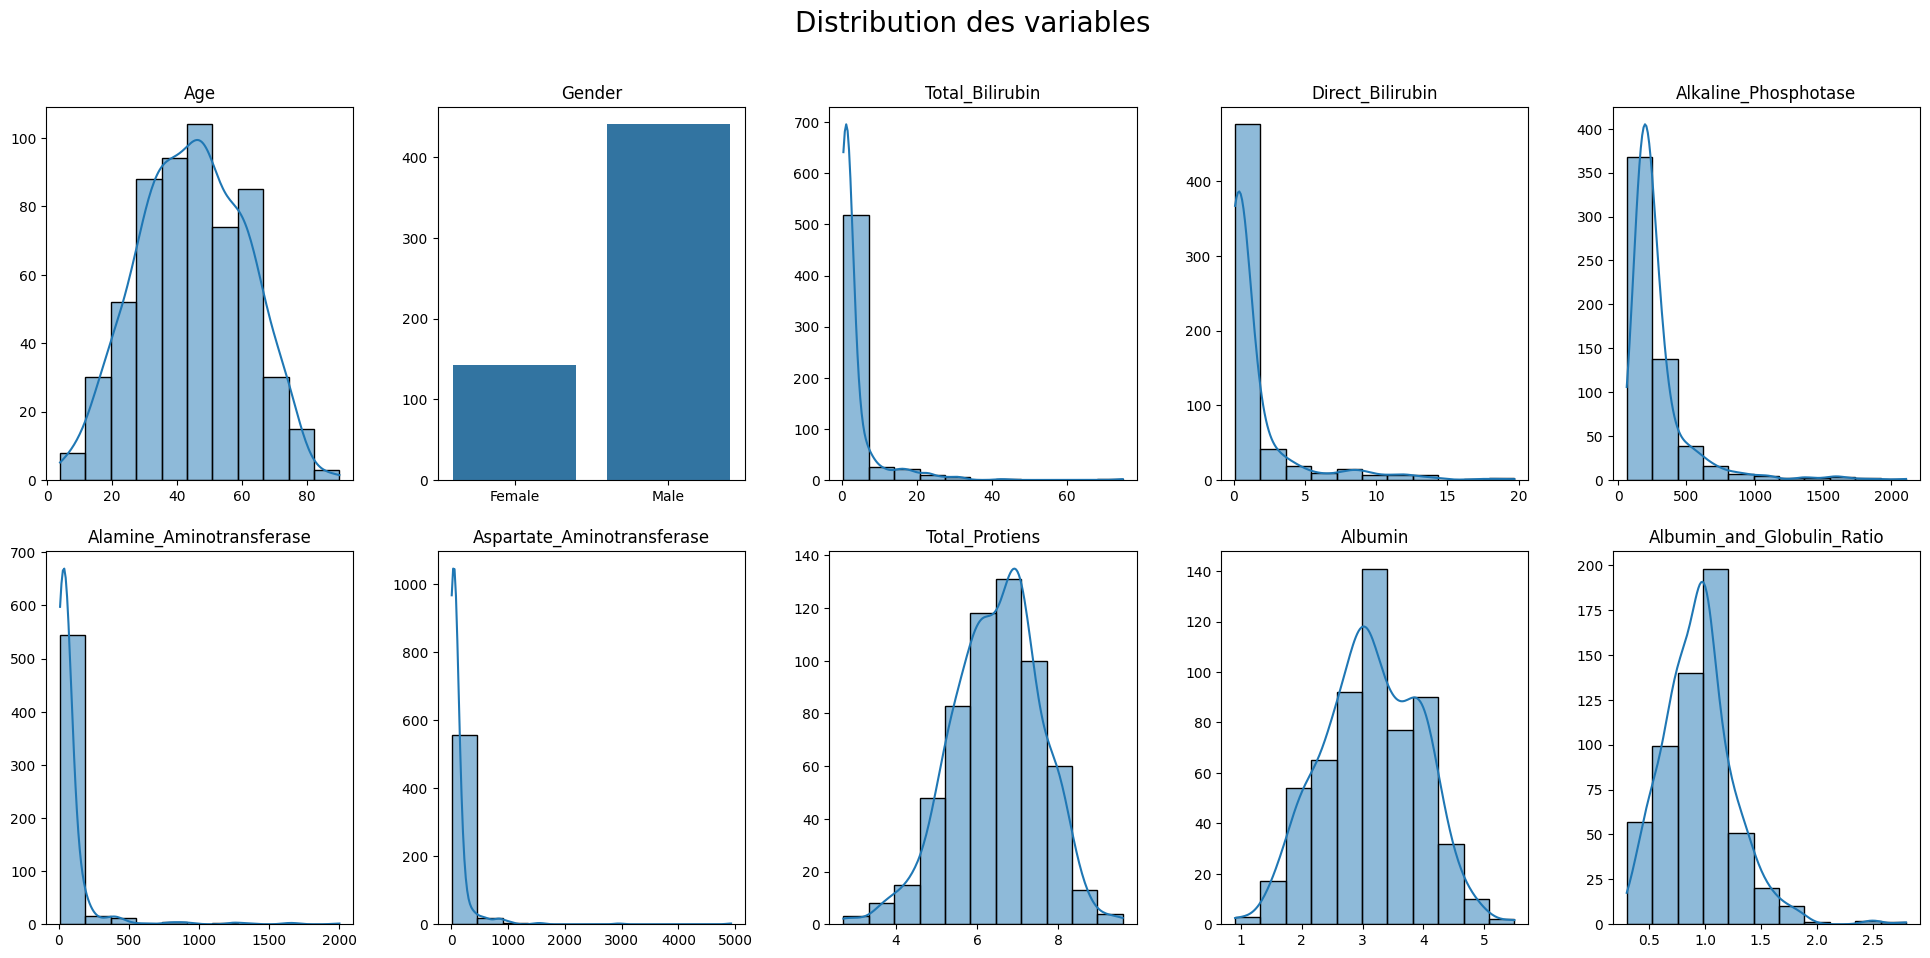

In [224]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 2 rangées et 5 colonnes pour un total de 10 sous-graphiques
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

df_analyse = df.drop(columns=['Dataset'])
# Boucle sur les colonnes pour créer les histogrammes
for i, col in enumerate(df_analyse):
    ax = axes[i//5, i%5]
    if col == "Gender":
        sns.countplot(x=df[col], ax=ax)
        ax.set_title('Gender')
        ax.set_xlabel('')
        ax.set_ylabel('')
    else:
        sns.histplot(df[col], bins='sturges', kde=True, ax=ax)
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.show()

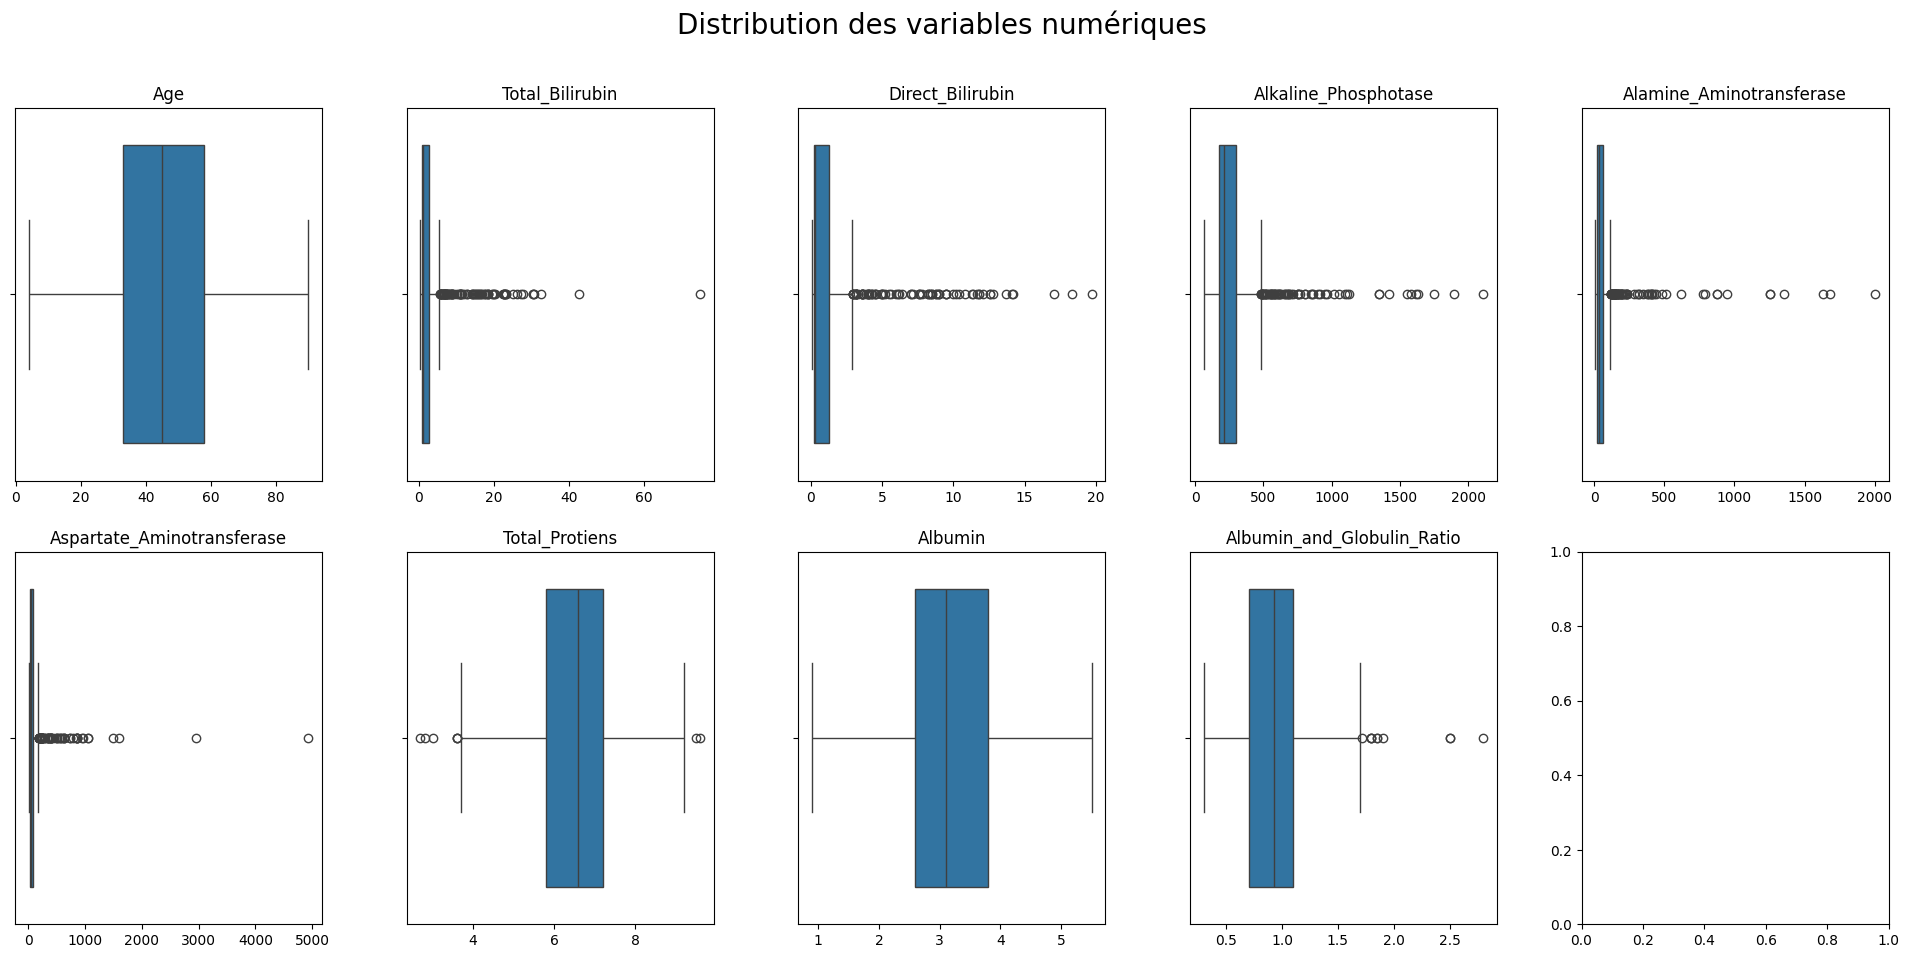

In [225]:
'''
Observation des data pour observer les outliers 
suite à l'observation des distributions sur les variables
'''
df_num = df_analyse.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Distribution des variables numériques', fontsize=20)
fig.tight_layout(pad=3.0)


for i, col in enumerate(df_num):
    sns.boxplot(x=df[col], ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

D'après les définitions des variables et les valeurs attendu il ne devraient y avoir des outliers que sur la partie supérieure ce qu'on a, sauf pour la colonne Total_Proteins.

#### Commentaire sur les outliers Q1:

Total_Proteins : les outliers ne sont pas très grands mais peuvent s'expliquer par des cas avancés où la synthèse protéique du foie est compromise.

#### Commentaires sur les outliers Q3:

L'ensemble des outliers des colonnes Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase et Aspartate_Aminotransferase sont des cas très sévère qui peuvent être lié au maladie suivante : Hémochromatose, Maladie de Wilson, NASH, cirrhose, Hépatites, stéatohépatite non-alcoolique.
Ces outliers restent donc cohérents dans l'ensemble à part quelques cas extrêmes : Aspartate_Aminotransferase avec 4929.0, Alamine_Aminotransferase à 2000.0, Alkaline_Phosphotase à 2110.0 et Total_Bilirubin à 75.

## 2 - Nettoyage des données

### 2.1 - Traitement des valeur manquantes grâce à un graphique de repartition du ratio albumine globuline 

C:\Users\Thomas\AppData\Local\Temp\ipykernel_22692\3122716700.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Albumin_and_Globulin_Ratio'], shade=True)


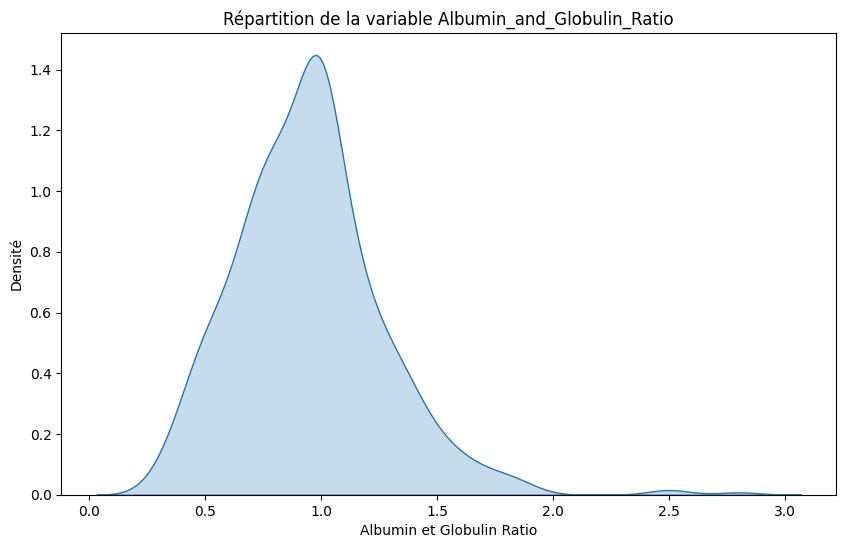

In [226]:
# diagramme répartition albumin-globuline ration
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Albumin_and_Globulin_Ratio'], shade=True)
plt.title('Répartition de la variable Albumin_and_Globulin_Ratio')
plt.xlabel('Albumin et Globulin Ratio')
plt.ylabel('Densité')
plt.show()

In [227]:
skewness = df['Albumin_and_Globulin_Ratio'].skew()
print(f"\nSkewness de 'Albumin_and_Globulin_Ratio': {skewness}")


Skewness de 'Albumin_and_Globulin_Ratio': 0.9922994479668144


In [228]:
# On choisit de remplacer les valeurs manquantes par la médiane car la distribution est asymétrique

df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)
df

C:\Users\Thomas\AppData\Local\Temp\ipykernel_22692\3247890672.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [229]:
skewness = df['Albumin_and_Globulin_Ratio'].skew()
print(f"\nSkewness de 'Albumin_and_Globulin_Ratio': {skewness}")


Skewness de 'Albumin_and_Globulin_Ratio': 0.996779661760487


In [230]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

### 2.3 - Traitement des doublons

In [231]:
# suppression des doublons car ce sont les mêmes patients	

df = df.drop_duplicates()
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [232]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [233]:
# changement de la valeur 75 dans la colonne total_bilirubine à 7.5

df.loc[df['Total_Bilirubin'] == 75, 'Total_Bilirubin'] = 7.5

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,570.0,44.849123,16.242182,4.0,33.0,45.00,58.00,90.0
Total_Bilirubin,570.0,3.203333,5.502203,0.4,0.8,1.00,2.60,42.8
Direct_Bilirubin,570.0,1.497544,2.833231,0.1,0.2,0.30,1.30,19.7
Alkaline_Phosphotase,570.0,291.750877,245.291859,63.0,176.0,208.00,298.00,2110.0
Alamine_Aminotransferase,570.0,79.728070,181.471697,10.0,23.0,35.00,60.00,2000.0
Aspartate_Aminotransferase,570.0,109.380702,290.880671,10.0,25.0,41.00,86.75,4929.0
Total_Protiens,570.0,6.496316,1.088300,2.7,5.8,6.60,7.20,9.6
Albumin,570.0,3.148947,0.796813,0.9,2.6,3.10,3.80,5.5
Albumin_and_Globulin_Ratio,570.0,0.947877,0.318513,0.3,0.7,0.93,1.10,2.8
Dataset,570.0,1.287719,0.453097,1.0,1.0,1.00,2.00,2.0


In [234]:
# Drop des colonnes Direct_Bilirubin, Aspartate_Aminotransferase, Total_Protiens, Albumin car trop correler avec les autres

df_cleaned =  df.drop(columns=['Direct_Bilirubin', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin'])
df_cleaned

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,187,16,0.90,1
1,62,Male,10.9,699,64,0.74,1
2,62,Male,7.3,490,60,0.89,1
3,58,Male,1.0,182,14,1.00,1
4,72,Male,3.9,195,27,0.40,1
...,...,...,...,...,...,...,...
578,60,Male,0.5,500,20,0.37,2
579,40,Male,0.6,98,35,1.10,1
580,52,Male,0.8,245,48,1.00,1
581,31,Male,1.3,184,29,1.00,1


## 3 - Visualisation des données

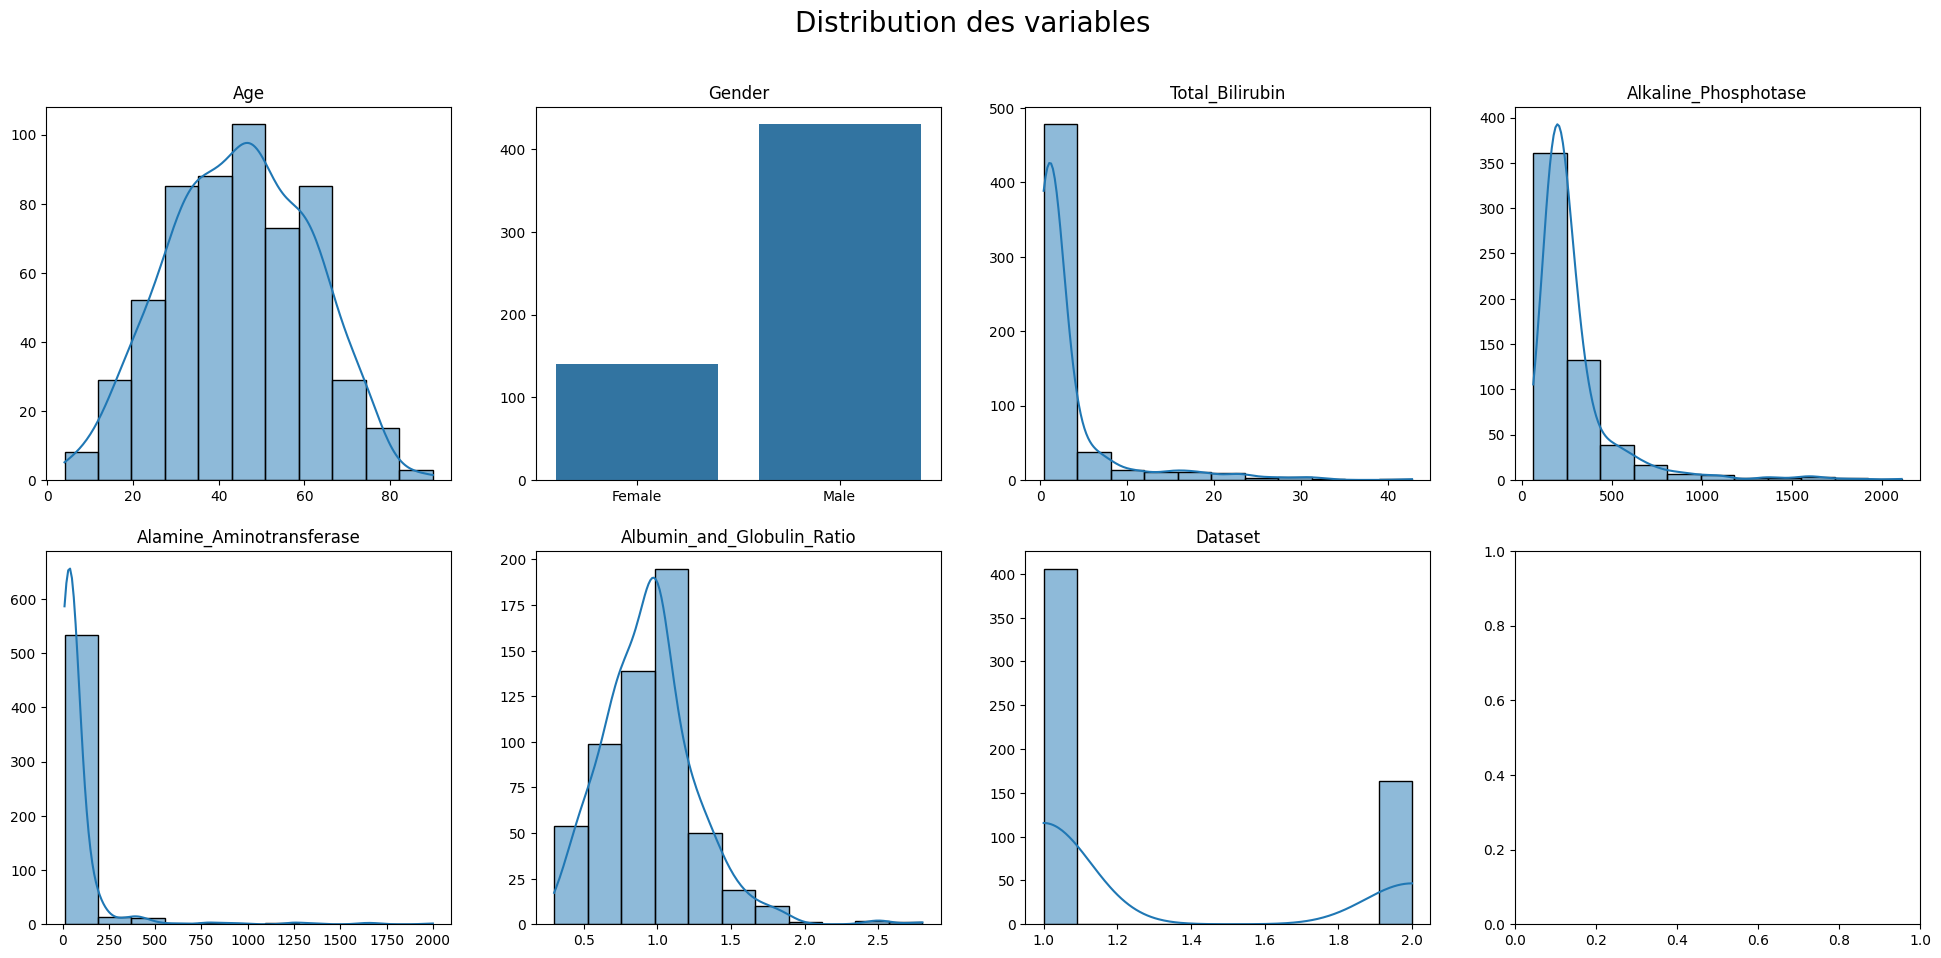

In [236]:
'''
Observation des data 
'''
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rangées et 5 colonnes pour un total de 10 sous-graphiques
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

# Boucle sur les colonnes pour créer les histogrammes
for i, col in enumerate(df_cleaned):
    ax = axes[i//4, i%4]
    if col == "Gender":
        sns.countplot(x=df_cleaned[col], ax=ax)
        ax.set_title('Gender')
        ax.set_xlabel('')
        ax.set_ylabel('')
    else:
        sns.histplot(df[col], bins='sturges', kde=True, ax=ax)
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.show()

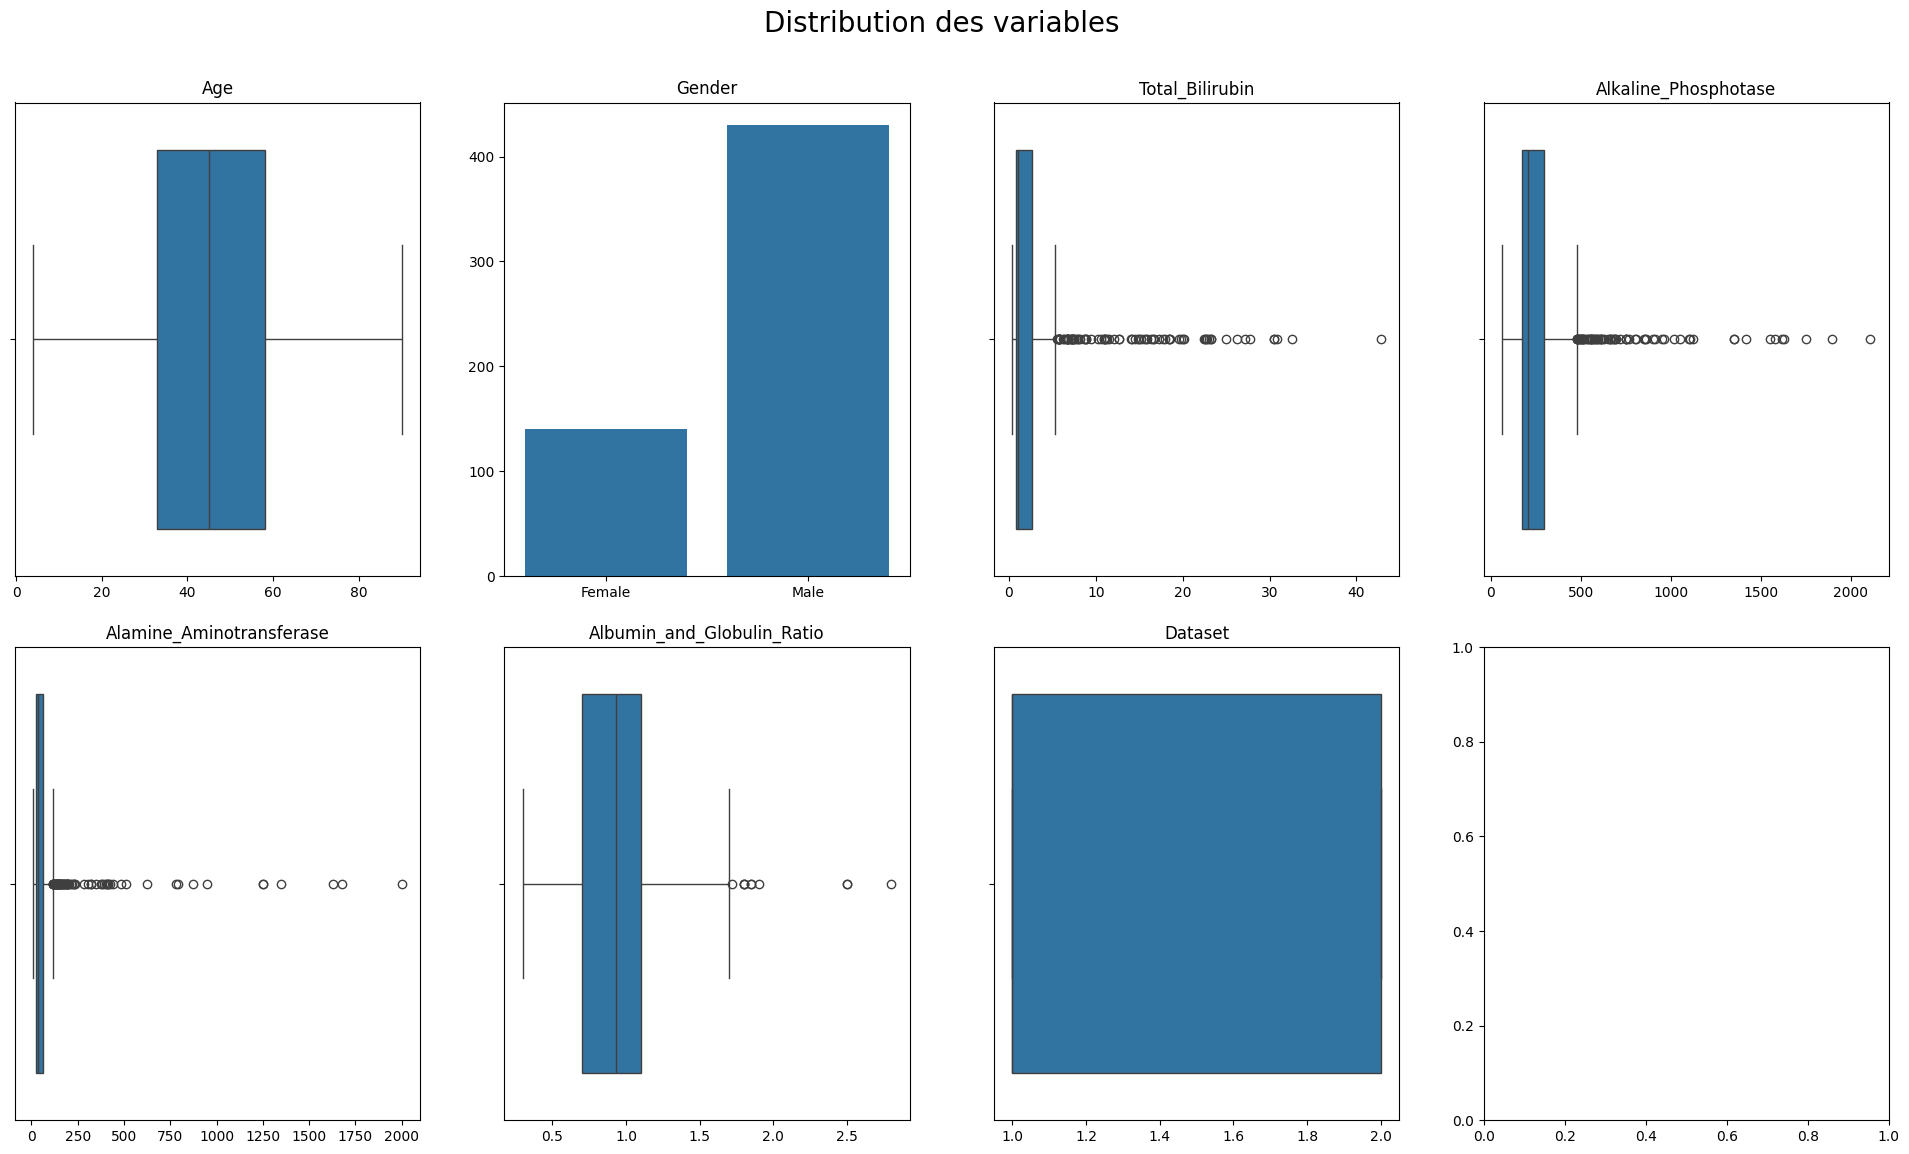

In [237]:
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

# Boucle sur les colonnes à partir de la deuxième (car 'Gender' est catégorique)
for i, col in enumerate(df_cleaned.columns):
    ax = axes[i//4, i%4]
    if col == "Gender":
        sns.countplot(x=df_cleaned[col], ax=ax)
        ax.set_title('Gender')
        ax.set_xlabel('')
        ax.set_ylabel('')
    else:
        sns.boxplot(x=df[col],ax=ax)
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.show()

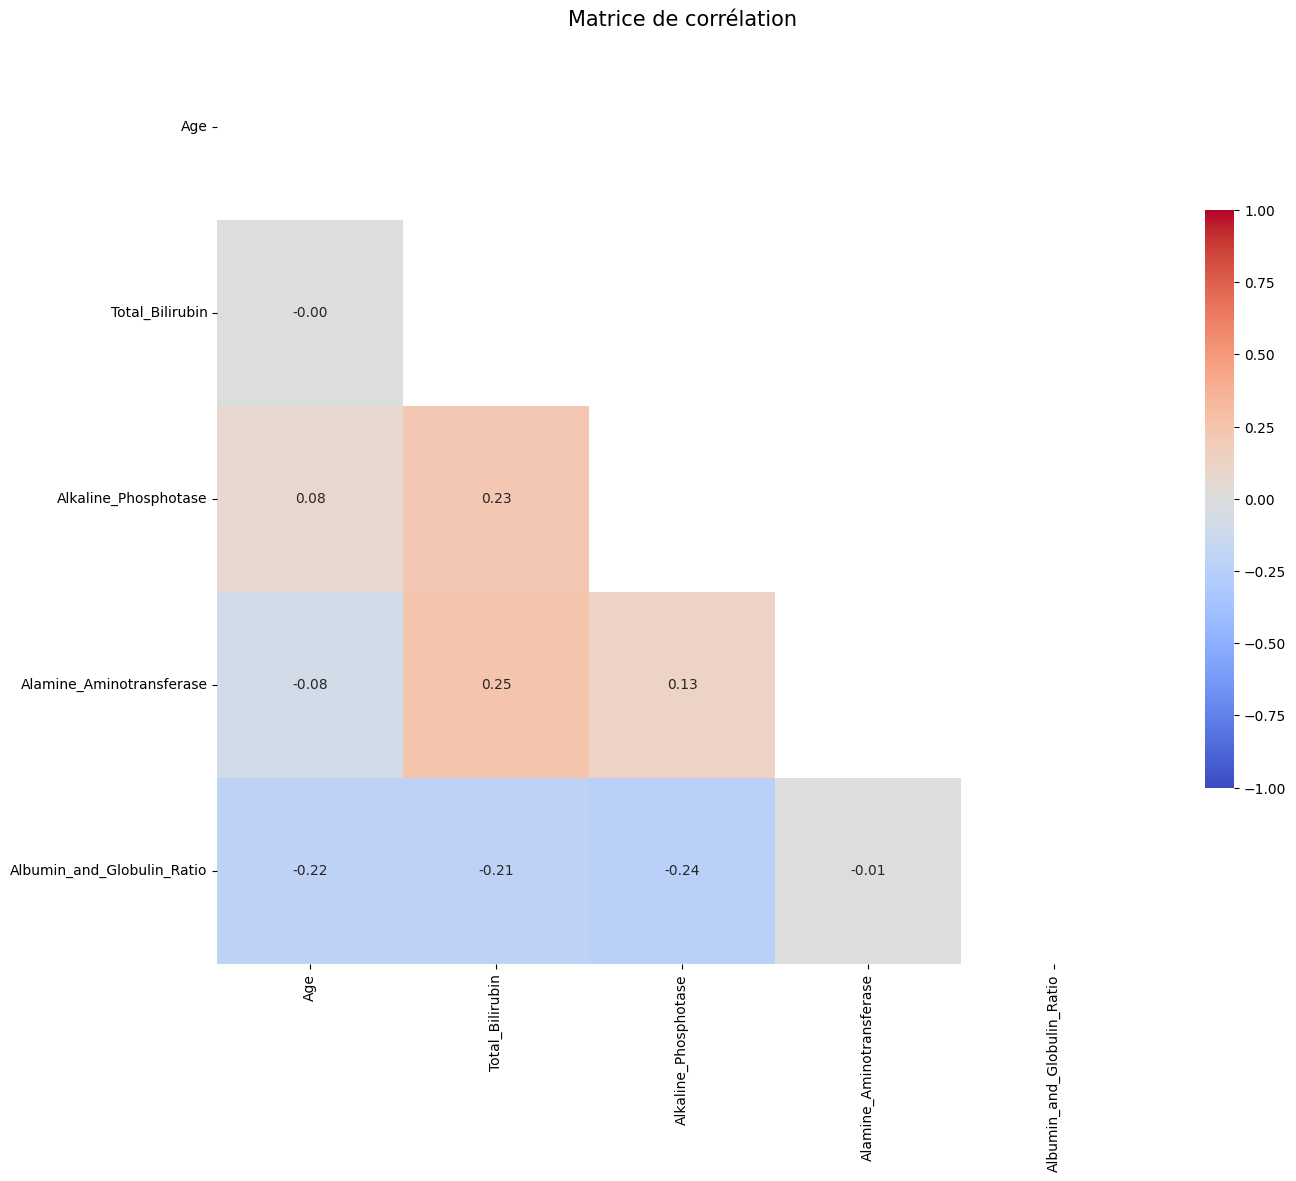

In [238]:
# observation des corrélations avec la matrice de corrélation
list_columns_corr = [col for col in df_cleaned.columns if (col != 'Dataset') and (col != 'Gender')]

plt.figure(figsize=(15, 15))

corr = df_cleaned[list_columns_corr].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.title('Matrice de corrélation', fontsize=15)
plt.show()

#### 3.2.2 - Correlations des variables numériques et de la variable de classification

In [239]:
# encodage 0 ou 1 pour la class 'dataset'
label_encoder = LabelEncoder()

In [240]:
df_cleaned['Gender'] = LabelEncoder().fit_transform(df_cleaned['Gender'])
df_cleaned['Dataset'] = LabelEncoder().fit_transform(df_cleaned['Dataset'])

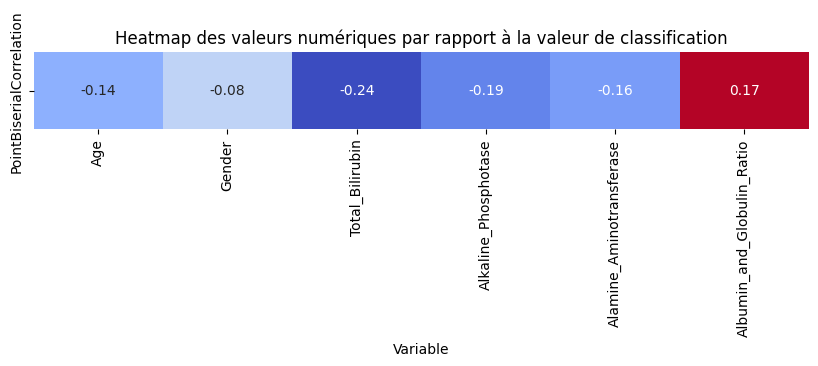

In [241]:
# Sélection des colonnes sans la colonne 'Dataset'
col_without_ds = df_cleaned.iloc[:, :-1]

col_without_ds = col_without_ds.apply(pd.to_numeric, errors='coerce')

correlations = {}

# Calculer la corrélation bisériale ponctuelle pour chaque variable
for col in col_without_ds:
    if col in df_cleaned:
        correlations[col] = pointbiserialr(df_cleaned['Dataset'], df_cleaned[col])[0]

# Convert the dictionary to a DataFrame for the heatmap
corr_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'PointBiserialCorrelation'])
corr_df.set_index('Variable', inplace=True)

# Create the figure for the heatmap
plt.figure(figsize=(10, 1))

# Plot the heatmap
sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', cbar=False, fmt=".2f")
plt.title('Heatmap des valeurs numériques par rapport à la valeur de classification')

# Show the heatmap
plt.show()

## 4 - Validations statistique pour l'interpretation des résultats

### 4.1 - Sépration des variables en df_1 et df_2

In [259]:
df_1 = df_cleaned[df_cleaned['Dataset'] == 0] # df qui aura la valeur du dataset 1
df_2 = df_cleaned[df_cleaned['Dataset'] == 1] # df qui aura la valeur du dataset 2

In [258]:
df_1

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,187,16,0.90,0
1,62,1,10.9,699,64,0.74,0
2,62,1,7.3,490,60,0.89,0
3,58,1,1.0,182,14,1.00,0
4,72,1,3.9,195,27,0.40,0
...,...,...,...,...,...,...,...
576,32,1,15.0,289,58,0.70,0
577,32,1,12.7,190,28,0.90,0
579,40,1,0.6,98,35,1.10,0
580,52,1,0.8,245,48,1.00,0


In [257]:
df_2

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin_and_Globulin_Ratio,Dataset
8,17,1,0.9,202,22,1.20,1
12,64,1,0.9,310,61,0.90,1
15,25,1,0.6,183,91,0.70,1
17,33,1,1.6,165,15,0.92,1
24,63,1,0.9,194,52,1.85,1
...,...,...,...,...,...,...,...
551,29,1,1.2,160,20,0.90,1
564,38,0,0.6,165,22,0.90,1
566,50,0,1.0,191,22,1.00,1
578,60,1,0.5,500,20,0.37,1


In [262]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406 entries, 0 to 581
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         406 non-null    int64  
 1   Gender                      406 non-null    int32  
 2   Total_Bilirubin             406 non-null    float64
 3   Alkaline_Phosphotase        406 non-null    int64  
 4   Alamine_Aminotransferase    406 non-null    int64  
 5   Albumin_and_Globulin_Ratio  406 non-null    float64
 6   Dataset                     406 non-null    int64  
dtypes: float64(2), int32(1), int64(4)
memory usage: 23.8 KB


### 4.2 - Test sur les variables

<b>Sélection du Test</b>  

<u>Données normales et variances égales :</u> Utilisez le test t de Student.  

<u>Données normales et variances inégales :</u>  Utilisez le test t de Welch.  

<u>Données non normales :</u>  Utilisez le test de Mann-Whitney U ou Kruskal-Wallis (extension non paramétrique du test de Mann-Whitney U) ou le test de Kolmogorov-Smirnov.  

<u>Données catégorielles :</u>  Utilisez le test de chi-carré ou le test de Fisher. 

Test t de Student :

Objectif : Comparer les moyennes de deux échantillons indépendants.
Conditions : Les données doivent être normalement distribuées et les variances des deux échantillons doivent être égales (homoscédasticité).
Variante : Test t de Welch, utilisé lorsque les variances ne sont pas égales.

NB :  
Test de chi-carré :

Objectif : Comparer les distributions de deux variables catégorielles (si la variable est discrète).  
Conditions : Les données doivent être sous forme de comptage dans des catégories.
  
  
Test de Fisher :

Objectif : Comparer les proportions dans des tableaux de contingence pour des petits échantillons.  
Conditions : Utilisé lorsque les effectifs des catégories sont petits.

Test de Mann-Whitney U (ou test de Wilcoxon pour échantillons indépendants) :

Objectif : Comparer les distributions de deux échantillons indépendants.  
Conditions : Non paramétrique, donc aucune hypothèse sur la distribution des données.  
  
  
Test de Kolmogorov-Smirnov :

Objectif : Comparer les distributions cumulatives de deux échantillons.  
Conditions : Non paramétrique, donc aucune hypothèse sur la distribution des données.  

#### 4.2.1 - Test sur les variables catégorielles

In [246]:
'''
Non concerné pour dataset maladie chronique du foie 
'''

'\nNon concerné pour dataset maladie chronique du foie \n'

#### 4.2.2 - Variable continue

Interprétation des résultats  
Statistique H : Valeur de la statistique de Kruskal-Wallis.  
p-value : Si la p-value est inférieure à un seuil alpha (par exemple 0.05), vous rejetez l'hypothèse nulle selon laquelle les distributions des échantillons sont identiques.

In [244]:
# #uniformisation de la taille des df

In [264]:
# parcours des variables pour le test sur mean

# liste des variables numériques
numerical_columns = ['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Albumin_and_Globulin_Ratio']

# Création d'un dictionnaire pour stocker les résultats
results = {}

# Test de Kruskal-Wallis pour chaque variable
for col in numerical_columns:
    stat, p_value = kruskal(df_1[col], df_2[col])
    results[col] = {'Statistique H': stat, 'p-value': p_value}

# Convertir le dictionnaire en DataFrame
results_df = pd.DataFrame(results).T


results_df


,Statistique H,p-value
Age,9.537852,2.012772e-03
Total_Bilirubin,56.863760,4.670745e-14
Alkaline_Phosphotase,42.749279,6.222481e-11
Alamine_Aminotransferase,48.074005,4.104320e-12
Albumin_and_Globulin_Ratio,21.784460,3.050610e-06


## 5 - Préparation des données - prétraitement


### 5.1 - Preparation du pipeline

In [265]:
# définition des colonnnes à prendre en considération 

class_feature = ['Dataset']

feature_std = list(df.columns)
feature_std.remove('Dataset')

In [266]:
# transformation des transomateurs pour les variables numériques

numeric_transformer = Pipeline(steps=[
    ('StdScaller', StandardScaler())
])



# Preprocessing des données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, feature_std)
    ]
)

## 6 - Definition et essai des models

### 6.0 - Definition des X et y

In [268]:
X = df[feature_std]

y = df['Dataset']

In [269]:
# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)